In [1]:
import ktrain
from ktrain import text
import pandas as pd
from pandas import DataFrame

In [2]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv('sigstaff.csv',
                      label_columns = ["label"],
                      text_column = "text",
                      preprocess_mode='bert',
                      ngram_range=1,
                      val_pct=0.2,
                      val_filepath=None,
                      maxlen=256)

detected encoding: utf-8 (if wrong, set manually)
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [3]:
learner = ktrain.get_learner(text.text_classifier('bert', (x_train, y_train), preproc=preproc, metrics = ['accuracy','AUC']),
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=12)

Is Multi-Label? False
maxlen is 256
done.


simulating training for different learning rates... this may take a few moments...
Train on 648 samples
Epoch 1/5
648/648 [==============================] - 92s 142ms/sample - loss: 0.5969 - accuracy: 0.6358 - AUC: 0.7322
Epoch 2/5
648/648 [==============================] - 74s 114ms/sample - loss: 0.1981 - accuracy: 0.9321 - AUC: 0.9774
Epoch 3/5
648/648 [==============================] - 74s 115ms/sample - loss: 0.6470 - accuracy: 0.7963 - AUC: 0.8454
Epoch 4/5
372/648 [================>.............] - ETA: 31s - loss: 1.2203 - accuracy: 0.7204 - AUC: 0.8108

done.
Visually inspect loss plot and select learning rate associated with falling loss


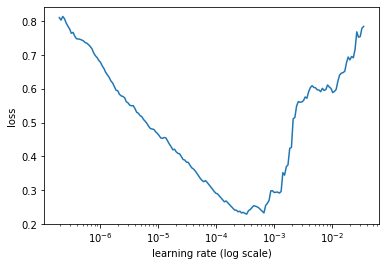

In [4]:
learner.lr_find(show_plot=True, max_epochs=5)

In [5]:
learner.autofit(2e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 2e-05...
Train on 648 samples, validate on 162 samples
Epoch 1/1024
648/648 [==============================] - 86s 132ms/sample - loss: 0.3238 - accuracy: 0.8673 - AUC: 0.9362 - val_loss: 0.1224 - val_accuracy: 0.9568 - val_AUC: 0.9889
Epoch 2/1024
648/648 [==============================] - 82s 126ms/sample - loss: 0.1426 - accuracy: 0.9583 - AUC: 0.9865 - val_loss: 0.0753 - val_accuracy: 0.9877 - val_AUC: 0.9936
Epoch 3/1024
648/648 [==============================] - 81s 124ms/sample - loss: 0.1156 - accuracy: 0.9645 - AUC: 0.9910 - val_loss: 0.0803 - val_accuracy: 0.9815 - val_AUC: 0.9942
Epoch 4/1024
648/648 [==============================] - 81s 125ms/sample - loss: 0.1046 - accuracy: 0.9660 - AUC: 0.9931 - val_loss: 0.0733 - val_accuracy: 0.9815 - val_AUC: 0.9957
Epoch 5/1024
648/648 [========================

In [6]:
learner.validate(val_data=(x_test, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.95      0.95      0.95        20

    accuracy                           0.99       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.99      0.99      0.99       162



array([[141,   1],
       [  1,  19]])

In [7]:
learner.model.save('models_sigstaff')

In [8]:
learner.model.save_weights('models_sigstaff')

In [9]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [10]:
db = pd.read_csv('data_forBERT_clean.csv', header=0)

In [ ]:
predictions = predictor.predict(db.text.tolist())

In [ ]:
predictions_list = DataFrame(predictions, columns=['label'])

In [ ]:
predictions_list.to_csv("sigstaff_preds.csv")